In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def load_image(path):
    img = Image.open(path)
    return np.array(img)

In [3]:
def save_image(path, nparr):
    img = Image.fromarray(nparr)
    img.save("./results/"+path)

In [4]:
def plot_compare(*args):
    L = len(args)

    if (L == 0):
        return
    elif (L == 1):
        plt.imshow(args[0])
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(10,10*L))
        for i, ax in enumerate(axs):
            ax.imshow(args[i])
            ax.axis('off')
    plt.show()

In [5]:
def convolve_filter(image, FILTER):
    N = len(FILTER)
    resulting_channels = [] 

    channels = np.transpose(image, axes=[2, 0, 1])
    for channel in channels:
        view_shape = tuple(np.subtract(channel.shape, (N,N)) + 1) + (N, N)
        strides = channel.strides + channel.strides
        sub_matrices = np.lib.stride_tricks.as_strided(channel,view_shape,strides)
        filtered = np.einsum('ij,klij',FILTER,sub_matrices)
        result = np.clip(filtered, 0, 255).astype(np.uint8)
        resulting_channels.append(result)

    transposed = np.transpose(np.array(resulting_channels), axes=[1, 2, 0])
    return  np.clip(transposed, 0, 255)

### Item 1

Implemente uma funcao que receba uma imagem em formato PPM, o tamanho n de um filtro espacial com dimensões n*n e a matriz com os pesos do filtro, e aplique o filtro com uma convolução, gerando e salvando a
imagem resultante no disco em formato PPM. Você não pode usar a OpenCV em nenhum desses passos. As especificações do formato PPM podem ser encontradas aqui: https://netpbm.sourceforge.net/doc/ppm.html

#### Building

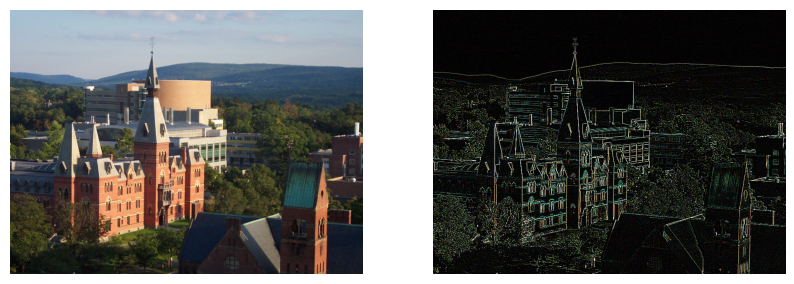

In [6]:
IMAGE = "building"
FILTER = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
original = load_image(f"./images/{IMAGE}.ppm")
result = convolve_filter(original, FILTER)
save_image(f"{IMAGE}_filtered.ppm", result)
save_image(f"{IMAGE}_filtered.jpg", result)

plot_compare(original,result)

#### Falls

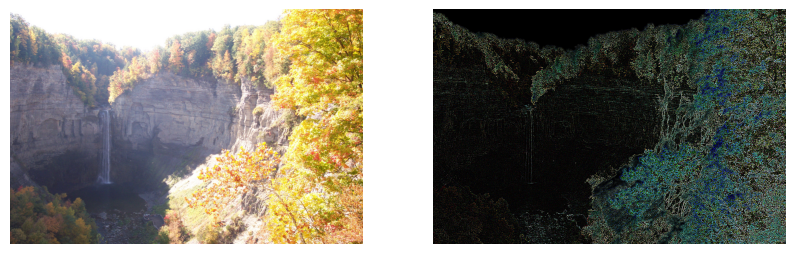

In [7]:
IMAGE = "falls"
FILTER = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
original = load_image(f"./images/{IMAGE}.ppm")
result = convolve_filter(original, FILTER)
save_image(f"{IMAGE}_filtered.ppm", result)
save_image(f"{IMAGE}_filtered.jpg", result)

plot_compare(original,result)

#### Tree

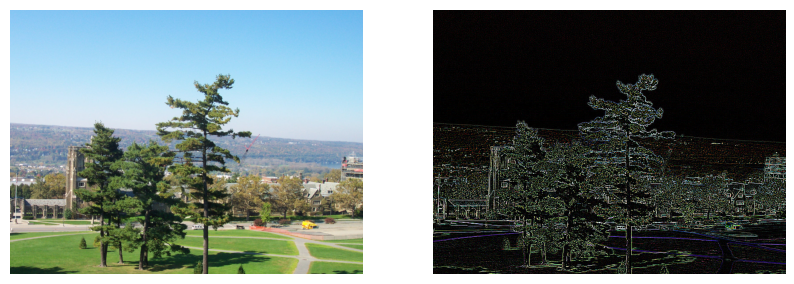

In [8]:
IMAGE = "tree"
FILTER = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
original = load_image(f"./images/{IMAGE}.ppm")
result = convolve_filter(original, FILTER)
save_image(f"{IMAGE}_filtered.ppm", result)
save_image(f"{IMAGE}_filtered.jpg", result)

plot_compare(original,result)